In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import seaborn as sn
from astropy.io import ascii
import astropy.constants as c
import astropy.units as u
import exoatlas as ea

In [47]:
solar_system = ascii.read('Data/SolarSys_data.dat')
candidates = pandas.read_csv('Data/toi-catalog.csv',comment='#')
params = pandas.read_csv('Data/TESS_Objects.csv',comment='#')
target_list = pandas.read_csv('Data/target_list_2021A.csv',comment='#')

In [40]:
pop = ea.TransitingExoplanets()

C:\Users\wwaal\Desktop\Research\TESS_Followup\exoatlas-downloads\data/standardized-AllExoplanets.txt is 0.007 days old.


Should it be updated? [y/N] n


In [48]:
params = pandas.read_csv('Data/mdwarfTOIs_150pc.csv',comment='#')
pop = pop[pop.stellar_radius < 0.5*u.R_sun]
pop = pop[pop.distance < 150.0*u.pc]

In [49]:
# Data on all TOIs
tic_id = candidates['TIC']
TOI = candidates['Full TOI ID']
Tmag = np.array(candidates['TMag Value'])
Period = np.array(candidates['Orbital Period Value'])
dPeriod = np.array(candidates['Orbital Period Error'])
R_s = np.array(candidates['Star Radius Value'])
dR_s = np.array(candidates['Star Radius Error'])
R_p = np.array(candidates['Planet Radius Value'])
dR_p = np.array(candidates['Planet Radius Error'])
Insolation = np.array(candidates['Effective Stellar Flux Value'])
T_eq = np.array(candidates['Planet Equilibrium Temperature (K) Value'])
T_eff = np.array(candidates['Effective Temperature Value'])
Depth = np.array(candidates['Transit Depth Value'])/1000

In [51]:
# Data on M dwarf TOIs
tic_id_sample = params['TIC ID']
TOI_sample = params['TOI']
Tmag_sample = np.array(params['Tmag'])
Period_sample = np.array(params['P (days)'] )# must be in days
dPeriod_sample = np.array(params['dP']) # must be in days
R_s_sample = np.array(params['R_s'])
dR_s_sample = np.array(params['dR_s'])
R_p_sample = np.array(params['R_E']) # Earth radii
dR_p_sample = np.array(params['dRe'])
Insolation_sample = np.array(params['Insol'])
T_eq_sample = np.array(params['T_eq'])
T_eff_sample = np.array(params['T_eff'])
Depth_sample = np.array(params['Depth'])/1000 #ppt

have_data = params['Data']

In [52]:
# Data on subsample for LCO 2021A

tic_id_targets = target_list['TIC ID']
TOI_targets = target_list['TOI']
Tmag_targets = np.array(target_list['Tmag'])
Period_targets = np.array(target_list['P (days)'] )# must be in days
dPeriod_targets = np.array(target_list['dP']) # must be in days
R_s_targets = np.array(target_list['R_s'])
dR_s_targets = np.array(target_list['dR_s'])
R_p_targets = np.array(target_list['R_E']) # Earth radii
dR_p_targets = np.array(target_list['dRe'])
Insolation_targets = np.array(target_list['Insol'])
T_eq_targets = np.array(target_list['T_eq'])
T_eff_targets = np.array(target_list['T_eff'])
Depth_targets = np.array(target_list['Depth'])/1000 #ppt

In [53]:
Rp_all = pop.radius
vesc_all = np.sqrt(2*c.G*(pop.mass*c.M_earth)/(Rp_all*c.R_earth))
vtherm_all = np.sqrt(3*(c.k_B*pop.teq*u.K/c.m_p))
vesc_vtherm_all = vesc_all/vtherm_all

S = pop.relative_insolation

In [54]:
ss_names = solar_system['Planet']
ss_vesc = solar_system['Vesc']
ss_vtherm = solar_system['Vtherm']
ss_insol = solar_system['Insolation']
ss_re = solar_system['R_earth']

In [71]:
def TESS_Pop_plots(x, y, x_sample, y_sample,
                   xs_err,ys_err,
                   Title=None,
                   xlabel=None,
                   ylabel=None,
                   vmin=None,
                   vmax=None,
                   xlim=None,
                   ylim=None,
                   whatplot='Insolation',
                   fontcolor_a='blue',
                   fontcolor_b='red',
                   xscale = 'linear',
                   yscale = 'linear',
                   figname='You didnt give me a name.pdf',
                   extras=False):
    
    if ylim == None:
        ylim =[np.nanmin(y),np.nanmax(y)]
    if xlim == None:
        xlim =[np.nanmin(x),np.nanmax(x)]
    
    fig, ax1 = plt.subplots(figsize=(6,6), nrows=1, ncols=1)
    
    if extras == True:
        ax1.scatter(x_sample, y_sample, alpha=0.7, color = 'black',
                    label='Proposed Targets',s=12*Depth_targets)

#         ax1.errorbar(x_sample[have_data], y_sample[have_data],
#                      xerr = xs_err[have_data],
#                      yerr = ys_err[have_data],
#                      alpha=0.7,color = 'royalblue',
#                      label='Have LCO Data',fmt='o',markersize=5,
#                      zorder=-1)
        
    if whatplot == 'Insolation':
        
        ax1.scatter(x, y, alpha=0.4, color='#c45508', zorder=-100,
                label='M dwarf TOIs', s=5, rasterized=True)

        ax1.scatter(S, Rp_all, alpha = 0.9 ,color = 'gray', zorder=-500,
                    label='Confirmed Planets',s=5, rasterized=True)
        
        ax1.axvspan(0.25,1.5,alpha=0.3,color='green',label='Optimistic HZ')
        
        for i in range(len(ss_names)):
        
            ax1.scatter(ss_insol[i],ss_re[i],
                        zorder=10,s=20,color='#0d75f8')        
            if (ss_names[i] == 'Earth') or (ss_names[i] == 'Uranus') or (ss_names[i] == 'Mars'):
                ax1.annotate(ss_names[i], (ss_insol[i], ss_re[i]*1.1),fontsize=10,
                             zorder=1000,color='#0d75f8') 
            else:
                ax1.annotate(ss_names[i], (ss_insol[i], ss_re[i]*0.8),fontsize=10,zorder=1000,
                             color='#0d75f8')
                
    if whatplot == 'Escape':
        
        ax1.scatter(vesc_all/vtherm_all, Rp_all, alpha = 0.5 ,color = 'gray',
                    zorder=-500, label='Confirmed Planets',s=5)

        for i in range(len(ss_names)):

            ax1.scatter(ss_vesc[i]/ss_vtherm[i],ss_re[i],zorder=10,s=20, color='#0d75f8')

            if (ss_names[i] == 'Earth') or (ss_names[i] == 'Uranus'):
                ax1.annotate(ss_names[i], (ss_vesc[i]/ss_vtherm[i], ss_re[i]*1.1),fontsize=10,zorder=1000,
                             color='#0d75f8')

            else:
                ax1.annotate(ss_names[i], (ss_vesc[i]/ss_vtherm[i], ss_re[i]*0.7),fontsize=10,zorder=1000,
                             color='#0d75f8')


    ax1.set_ylabel(ylabel, fontsize=16)
    ax1.set_xlabel(xlabel,fontsize=16)
    ax1.set_title(Title,fontsize=17)
    
    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax1.legend(loc='lower left')
    ax1.set_yscale(yscale)
    ax1.set_xscale(xscale)

    plt.tight_layout()
    plt.savefig(figname,dpi=400)
    plt.show()

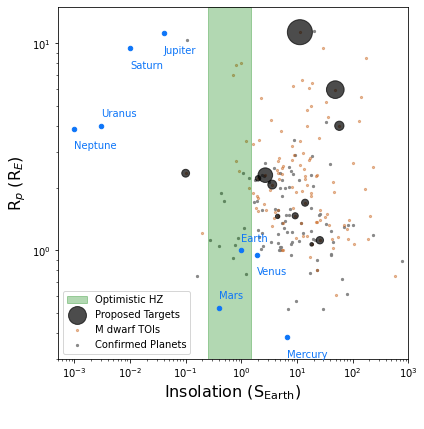

In [72]:
TESS_Pop_plots(y = R_p_sample,
               x = Insolation_sample,
               y_sample = R_p_targets,
               x_sample = Insolation_targets,
               ys_err = dR_p_targets,
               xs_err = 0.3*Insolation_targets,
               #Title = 'M Dwarf Candidates are Small and Cool',
               ylabel = r'R$_p$ (R$_{E}$)',
               xlabel = r'Insolation (S$_{\rm{Earth}}$)',
               whatplot='Insolation',
               fontcolor_a='black',
               fontcolor_b='black',
               xscale = 'log',
               yscale = 'log',
               ylim=[0.3,15],
               xlim = [0.0005, 1e3],
               figname='Figs/TOIs_Rp_Insol.pdf',extras=True)

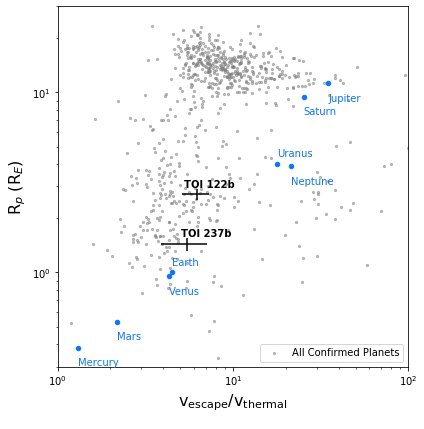

In [142]:
TESS_Pop_plots(y = Rp_all,
               x = vesc_all/vtherm_all,
               y_sample = 0,
               x_sample = 0,
               ys_err = 0,
               xs_err = 0,
               ylabel = r'R$_p$ (R$_{E}$)',
               xlabel = r'v$_{\rm{escape}}$/v$_{\rm{thermal}}$',
               whatplot = 'Escape',
               fontcolor_a='black',
               fontcolor_b='black',
               xscale = 'log',
               yscale = 'log',
               ylim=[0.3,30],
               xlim = [1, 1e2],
               figname='TOIs_vesc_vtherm.pdf')

In [ ]:
# TESS_Pop_plots(x = R_s,
#                y = Tmag,
#                x_sample = R_s_sample,
#                y_sample = Tmag_sample,
#                cbar = T_eff,
#                cbar_sample = T_eff_sample,
#                xs_err = dR_s_sample,
#                ys_err = np.zeros(shape=len(Tmag_sample)),
#                Title = 'M Dwarf Candidates Tend to be Faint',
#                xlabel = r'R$_s$ (R$_{\odot}$)',
#                ylabel = 'Tmag',
#                cbar_label = r'T$_{\rm{eff}}$',
#                vmin = 2400,
#                vmax = 4000,
#                yscale = 'linear',
#                xscale = 'log',
#                #xlim=[0.5,40],
#                cmap="coolwarm_r",
#                figname='TOIs_Rs_Tmag.pdf')

#ax1.axhspan(ylim[0],11,alpha=0.3,color='orange',label='Bright enough for RV')

In [ ]:
# TESS_Pop_plots(y = Tmag,
#                x = Depth,
#                x_sample = Depth_sample,
#                y_sample = Tmag_sample,
#                cbar = R_p,
#                cbar_sample = R_p_sample,
#                xs_err = np.zeros(shape=len(Tmag_sample)),
#                ys_err = np.zeros(shape=len(Tmag_sample)),
#                Title = 'Ground-based Followup Useful for Faint Targets',
#                xlabel = 'Depth (ppt)',
#                ylabel = 'Tmag',
#                cbar_label = r'R$_p$ (R$_{E}$)',
#                vmin = 1,
#                vmax = 10,
#                xscale = 'log',
#                #yscale = 'log',
#                xlim=[0.01,1e3],
#                cmap="plasma",
#                figname='TOIs_depth_tmag.pdf')

#ax1.axvspan(xlim[0],1,alpha=0.3,color='purple',label='Hard to detect this depth)

In [ ]:
# TESS_Pop_plots(y = R_p,
#                x = Period,
#                y_sample = R_p_sample,
#                x_sample = Period_sample,
#                cbar = Tmag,
#                cbar_sample = Tmag_sample,
#                ys_err = dR_p_sample,
#                xs_err = dPeriod_sample,
#                Title = 'Many Large M Dwarf Candidates',
#                ylabel = r'R$_p$ (R$_{E}$)',
#                xlabel = 'Orbital Period (d)',
#                cbar_label = 'Tmag',
#                vmin = 8.5,
#                vmax = 11,
#                xscale = 'log',
#                yscale = 'log',
#                ylim=[0.5,40],
#                cmap="cividis",
#                figname='TOIs_Rp_Per.pdf')

#ax1.axhspan(0,1.25,alpha=0.6,color='pink',label='Rp<1.25R$_{E}$')